In [1]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

path="/home/souranil/Source-Code/Final Year Project/Codebase/Project Dataset/"

2025-01-22 20:03:34.805484: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-22 20:03:34.916712: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737556414.976774   21009 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737556414.991603   21009 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-22 20:03:35.097152: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Dataset Preperation

In [2]:
print("The total number of datapoints: ", len(os.listdir(path+"Face images")))

image_metadata=pd.DataFrame(columns=['height', 'width', 'class'])
for i in os.listdir(path+"Face images"):
    image_metadata.loc[len(image_metadata)]= [cv2.imread(path+"Face images/"+i).shape[0],cv2.imread(path+"Face images/"+i).shape[1], 1]

print(image_metadata)
image_metadata.to_csv(path+"faces.csv")

The total number of datapoints:  2204
      height  width  class
0        350    500      1
1       1241   1000      1
2        957   1300      1
3       4000   2667      1
4        867   1300      1
...      ...    ...    ...
2199     236    236      1
2200     318    236      1
2201     157    236      1
2202     354    236      1
2203     236    236      1

[2204 rows x 3 columns]


In [4]:
print("The total number of datapoints: ", len(os.listdir(path+"Non Face images")))

image_metadata=pd.DataFrame(columns=['height', 'width', 'class'])
for i in os.listdir(path+"Non Face images"):
    image_metadata.loc[len(image_metadata)]= [cv2.imread(path+"Non Face images/"+i).shape[0],cv2.imread(path+"Non Face images/"+i).shape[1], 0]

print(image_metadata)
image_metadata.to_csv(path+"non faces.csv")

The total number of datapoints:  2256
      height  width  class
0        640    640      0
1        640    640      0
2        640    640      0
3        640    640      0
4        640    640      0
...      ...    ...    ...
2251     640    640      0
2252     640    640      0
2253     640    640      0
2254     640    640      0
2255     640    640      0

[2256 rows x 3 columns]


Resizing the images to a common size 

In [5]:
data=pd.read_csv(path+"faces.csv")
height_mean1=data['height'].mean()
width_mean1=data['width'].mean()

print("Height: ",height_mean1,"Width: ", width_mean1)
data=pd.read_csv(path+"non faces.csv")
height_mean2=data['height'].mean()
width_mean2=data['width'].mean()

print("Height: ",height_mean2,"Width: ", width_mean2)

height_mean=(height_mean2+height_mean1)/2
width_mean=(width_mean2+width_mean1)/2
print("Height: ",height_mean,"Width: ", width_mean)

Height:  874.8611615245009 Width:  956.5453720508167
Height:  1120.2056737588653 Width:  1322.163120567376
Height:  997.5334176416831 Width:  1139.3542463090962


In [20]:
size=150
for i in os.listdir(path+"Face images/"):
    image_data=cv2.imread(path+"Face images/"+i)
    image_data=cv2.resize(image_data, dsize=(size, size))
    cv2.imwrite(filename=path+"Face images/"+i, img=image_data)
    
for i in os.listdir(path+"Non Face images/"):
    image_data=cv2.imread(path+"Non Face images/"+i)
    image_data=cv2.resize(image_data, dsize=(size, size))
    cv2.imwrite(filename=path+"Non Face images/"+i, img=image_data)

Extracting data from the reshaped images

In [2]:
X=[]
image_file_names=os.listdir(path+"Face images/")
temp=None
for i in os.listdir(path+"Face images/"):
    temp=np.divide(cv2.imread(path+"Face images/"+i),255, dtype=np.float64)
    X.append(temp)

image_file_names=os.listdir(path+"Non Face images/")
for i in os.listdir(path+"Non Face images/"):
    temp=np.divide(cv2.imread(path+"Non Face images/"+i), 255, dtype=np.float64)
    X.append(temp)

X=np.array(X)
X=X.reshape([4460, 67500])
np.savetxt(path+"dataset.csv", X, delimiter=',', fmt='%f')
y=[0.00]*len(os.listdir(path+"Face images/"))+[1.00]*len(os.listdir(path+"Non Face images/"))
y=np.array(y, dtype=np.float64)
np.savetxt(path+"labels.csv", y, delimiter=',', fmt='%f')

In [2]:
X=np.loadtxt(path+'dataset.csv', delimiter=',')
X=X.reshape([4460, 150, 150, 3])
y=np.loadtxt(path+'labels.csv', delimiter=',')

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=89, train_size=0.75)
print(len(X_train), len(X_test))

X=None
y=None

3345 1115


Building the Model with Tensorflow / Keras

In [5]:
gpu=tf.config.list_physical_devices('GPU')
print(gpu[0])
model=Sequential()

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [6]:
model.add(Conv2D(70, (4,4), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D((3,3), strides=2))

model.add(Conv2D(50, (3,3), activation='relu',))
model.add(MaxPool2D((3,3)))

model.add(Conv2D(30, (3,3), activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

/home/souranil/Source-Code/Final Year Project/Codebase/project/lib64/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1737484796.088216    5666 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2618 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


In [7]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [9]:
model.fit(X_train, y_train, epochs=4, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/4
335/335 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.9958 - loss: 0.0102 - val_accuracy: 0.9848 - val_loss: 0.1087
Epoch 2/4
335/335 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.9995 - loss: 0.0010 - val_accuracy: 0.9857 - val_loss: 0.1345
Epoch 3/4
335/335 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.9998 - loss: 4.3261e-04 - val_accuracy: 0.9830 - val_loss: 0.1626
Epoch 4/4
335/335 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.9967 - loss: 0.0143 - val_accuracy: 0.9776 - val_loss: 0.0820


In [12]:
model.evaluate(X_test, y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9825 - loss: 0.0597


[0.08201351761817932, 0.9775784611701965]

In [9]:
print(model.input_shape)

(None, 150, 150, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1


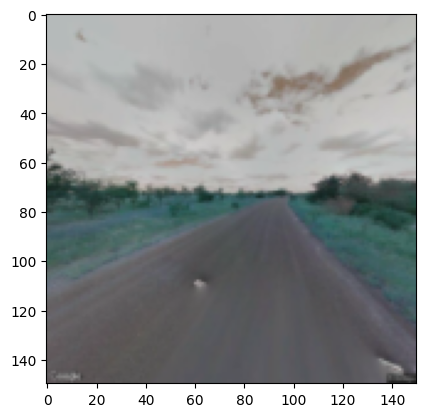

In [8]:
index=random.randint(0, len(X_test)-1)
plt.imshow(X_test[index])

# print(input.shape)
y_pred=model.predict(X_test[[index]])
print(int(np.round(y_pred[0])[0]))


In [ ]:
index=random.randint(0, len(os.listdir(path+)))

In [19]:
model.save("/home/souranil/Source-Code/Final Year Project/Codebase/Model/model1.keras")

Testing the saved Model

In [4]:
model=load_model("/home/souranil/Source-Code/Final Year Project/Codebase/Model/model1.keras")

I0000 00:00:1737556457.835109   21009 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2618 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
